In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os 
import datetime
import statsmodels.api as sm
import copy
from sklearn.linear_model import LinearRegression
plt.style.use('ggplot')

In [2]:
# !pip install statsmodels


In [3]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [4]:
path = '/home/superuser/Dados/proj/Sara/table/rois_serieLandsat_normalized_ptosV1.csv'
# path = '/home/superuser/Dados/proj/Sara/table/rois_serieLandsat_real_ptosV1.csv'
newdf = pd.read_csv(path)
newdf = newdf.drop(['system:index','.geo'], axis=1)
newdf.head()

,bai,baiml,baims,blue,class,evi,ids,mirbi,nbr,nbr2,ndmi,ndvi,nir,red,savi,swir1,swir2,year,year_rois
0,43.099194,22.019903,30.724222,113,1,0.270270,1,1.623916,0.659370,0.375100,0.377681,0.810798,1895,198,0.358875,856,389,2005,LC08_204031_20130417_normal
1,31.377766,27.770296,25.090773,601,2,0.075028,2,0.329500,0.160078,0.217905,-0.059917,0.482845,2377,829,0.282964,2680,1721,2005,LC08_204031_20130417_normal
2,35.840237,19.410265,12.465867,984,3,-0.111269,3,-1.372214,-0.216705,0.100415,-0.310366,0.244147,2232,1356,0.153004,4241,3467,2020,LC08_204031_20130417_normal
3,47.375180,39.552190,40.269825,482,1,0.051710,4,0.430240,0.116699,0.178862,-0.063488,0.421712,2043,831,0.230886,2320,1616,2013,LC08_204031_20130417_normal
4,88.768790,24.902817,25.147300,110,4,0.005712,5,1.958178,0.232143,0.104167,0.131148,-0.080000,69,81,-0.003495,53,43,2013,LC08_204031_20130417_normal


## Reconhecimento dos dados 

In [5]:
newdf.shape

(1395, 19)

In [6]:
columns = newdf.columns
columns

Index(['bai', 'baiml', 'baims', 'blue', 'class', 'evi', 'ids', 'mirbi', 'nbr',
       'nbr2', 'ndmi', 'ndvi', 'nir', 'red', 'savi', 'swir1', 'swir2', 'year',
       'year_rois'],
      dtype='object')

In [7]:
newdf[['class', 'evi']].groupby('class').count()

,evi
class,
1,527
2,167
3,173
4,183
5,172
6,173


In [8]:
df_class1 = newdf[newdf['class'] == 1]
print(df_class1[['year_rois', 'evi', 'class']].groupby('year_rois').count())

                             evi  class
year_rois                              
LC08_204031_20130417_normal    3      3
LC08_204031_20130604_normal    2      2
LC08_204031_20130620_normal    1      1
LC08_204031_20130706_normal    3      3
LC08_204031_20130722_normal    2      2
...                          ...    ...
LT05_204031_20110818_normal    3      3
LT05_204031_20110919_normal    3      3
LT05_204031_20111005_normal    3      3
LT05_204031_20111021_normal    3      3
LT05_204031_20111106_normal    2      2

[215 rows x 2 columns]


In [9]:
del df_class1

In [10]:
newdf[['year_rois', 'evi']].groupby('year_rois').count()

,evi
year_rois,
LC08_204031_20130417_normal,8
LC08_204031_20130604_normal,7
LC08_204031_20130620_normal,4
LC08_204031_20130706_normal,8
LC08_204031_20130722_normal,3
...,...
LT05_204031_20110818_normal,8
LT05_204031_20110919_normal,8
LT05_204031_20111005_normal,8


In [11]:
newdf[['ids', 'class']].groupby('ids').count()

,class
ids,
1,164
2,167
3,173
4,183
5,183
6,172
7,173
8,180


## Analises dos dados 

In [12]:
newdf.head(120)

,bai,baiml,baims,blue,class,evi,ids,mirbi,nbr,nbr2,ndmi,ndvi,nir,red,savi,swir1,swir2,year,year_rois
0,43.099194,22.019903,30.724222,113,1,0.270270,1,1.623916,0.659370,0.375100,0.377681,0.810798,1895,198,0.358875,856,389,2005,LC08_204031_20130417_normal
1,31.377766,27.770296,25.090773,601,2,0.075028,2,0.329500,0.160078,0.217905,-0.059917,0.482845,2377,829,0.282964,2680,1721,2005,LC08_204031_20130417_normal
2,35.840237,19.410265,12.465867,984,3,-0.111269,3,-1.372214,-0.216705,0.100415,-0.310366,0.244147,2232,1356,0.153004,4241,3467,2020,LC08_204031_20130417_normal
3,47.375180,39.552190,40.269825,482,1,0.051710,4,0.430240,0.116699,0.178862,-0.063488,0.421712,2043,831,0.230886,2320,1616,2013,LC08_204031_20130417_normal
4,88.768790,24.902817,25.147300,110,4,0.005712,5,1.958178,0.232143,0.104167,0.131148,-0.080000,69,81,-0.003495,53,43,2013,LC08_204031_20130417_normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,115.499985,28.680874,33.043037,76,5,0.048110,6,1.866356,0.445783,0.316832,0.150160,0.561822,360,101,0.071141,266,138,2013,LC08_204031_20141029_normal
116,71.311010,59.876904,58.931510,300,6,-0.006719,7,0.213126,-0.015198,0.096853,-0.111886,0.248774,1782,1072,0.135600,2231,1837,2017,LC08_204031_20141029_normal
117,22.562256,20.517426,14.544215,552,1,0.065810,8,-0.046306,0.123806,0.236975,-0.116590,0.473713,2705,966,0.300830,3419,2109,2002,LC08_204031_20141029_normal
118,93.577840,25.842130,26.101141,146,4,0.004245,5,1.927010,0.117647,0.062500,0.055556,-0.015544,95,98,-0.000867,85,75,2013,LC08_204031_20141130_normal


# distribuição dos dados 

| name class | ids  | class  | 
|------------|------|--------|
| fire 2005  |  1   |   1    | 
| vegetation |  2   |   2    | 
| soil       |  3   |   3    | 
| fire 2003  |  4   |   1    |
| water      |  5   |   4    |
| shade      |  6   |   5    |
| urban      |  7   |   6    |
| fire 2002  |  8   |   1    |

In [13]:
def get_date (row):
    
    date_joint = row['year_rois'].split('_')[2]
    year = int(date_joint[:4])
    mes = int(date_joint[4:6])
    dia = int(date_joint[6:])
    
    data = datetime.date(year=year,day=dia,month=mes)
    
    return data
    

In [14]:
newdf['tempo'] = newdf.apply(lambda row : get_date(row), axis= 1)
newdf.head(2)

,bai,baiml,baims,blue,class,evi,ids,mirbi,nbr,nbr2,ndmi,ndvi,nir,red,savi,swir1,swir2,year,year_rois,tempo
0,43.099194,22.019903,30.724222,113,1,0.270270,1,1.623916,0.659370,0.375100,0.377681,0.810798,1895,198,0.358875,856,389,2005,LC08_204031_20130417_normal,2013-04-17
1,31.377766,27.770296,25.090773,601,2,0.075028,2,0.329500,0.160078,0.217905,-0.059917,0.482845,2377,829,0.282964,2680,1721,2005,LC08_204031_20130417_normal,2013-04-17


In [15]:
# newdf = newdf.sort_values(by= ['tempo'])

# del ls_collect_time
# newdf[['tempo', 'evi']].groupby('tempo').count()

In [16]:
pd.set_option('display.precision',7)

In [17]:
newdf['bai']

0        43.099194
1        31.377766
2        35.840237
3        47.375180
4        88.768790
           ...    
1390     40.578815
1391     19.887634
1392    117.491970
1393    131.218960
1394    277.659000
Name: bai, Length: 1395, dtype: float64

In [18]:
ls_col = [kk for kk in newdf.columns]

print(ls_col)

['bai', 'baiml', 'baims', 'blue', 'class', 'evi', 'ids', 'mirbi', 'nbr', 'nbr2', 'ndmi', 'ndvi', 'nir', 'red', 'savi', 'swir1', 'swir2', 'year', 'year_rois', 'tempo']


In [19]:
data_inic = newdf['tempo'].iloc[0]
print("data inicial = ", data_inic)
print(newdf.shape[0])
data_end = newdf['tempo'].iloc[newdf.shape[0] - 1]
print("data final = ",data_end)

data inicial =  2013-04-17
1395
data final =  2011-11-06


In [20]:
dict_class = {
    '1': 'fire',
    '2': 'vegetation',
    '3': 'open_soil',
    '4': 'water',
    '5': 'shade',
    '6': 'urbano'
}
dict_ids = {
    '1': 'fire 2005',
    '2': 'vegetation',
    '3': 'open_soil',
    '4': 'fire 2013',
    '5': 'water',
    '6': 'shade',
    '7': 'urbano',
    '8': 'fire 2002',
}

In [22]:
# !pip install ggplot
# !pip install --upgrade pip

In [21]:
#from ggplot import *
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [22]:
def show_line_Serie (myDF, name_cc, name_idss, indice):
    
#     myDF = myDF.sort_values(by= ['tempo'])    
    fig,ax = plt.subplots(figsize=(14, 8))
    
    ax.plot(myDF["tempo"],myDF[indice], marker="*", color='red')
#     text = 'Plot class {} do ponto {}'.format(dict_class[cc], dict_ids[idss])
    texto = 'Plot class ' + name_cc +  ' do ponto ' + name_idss + "indice = " + indice
    plt.title(texto, fontweight="bold", size=20)
    plt.xlabel('serie de tempo',fontweight="bold", size=16)
    plt.ylabel('Valores de {} '.format(indice),fontweight="bold", size=16)
#     plt.xticks(data,rotation=70)    
    plt.legend(name_idss, loc='best') #
    plt.show()

In [23]:
def return_dataframe_pto(classe, idss):
    
    idx = np.where((newdf['class'] == classe) & (newdf['ids'] == idss))
    ponto1 = copy.deepcopy(newdf.loc[idx])
    print("carregando o ponto com {} ".format(ponto1.shape))
    
    # return a sorted DataFrame by date then count
    # ponto1 = ponto1.sort_values(by= ['tempo'])
    # if you want to reset the index 
#     ponto1 = ponto1.reset_index(drop= True)
    # print("carregando o ponto com {} ".format(ponto1.shape))
    return ponto1

## Analises independiente por ids

carregando o ponto com (164, 20) 


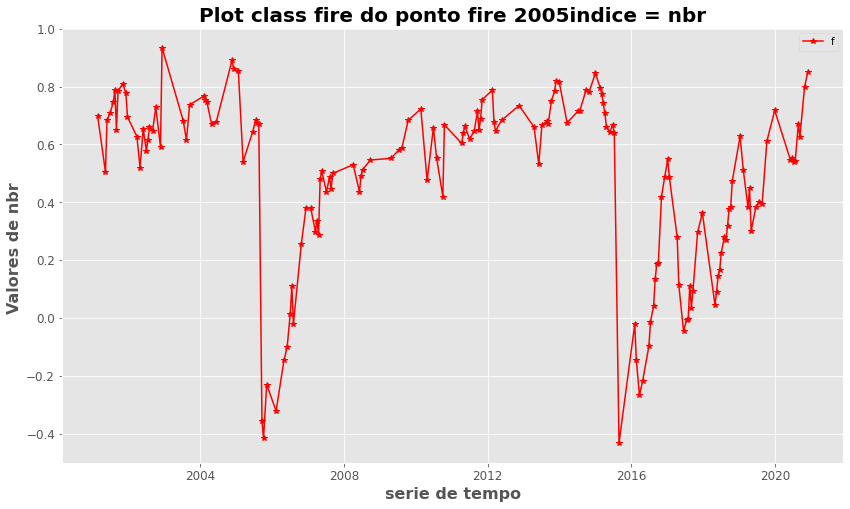

In [24]:
# Classe 1 ids = 1 fire 2005 
ptoV1 = return_dataframe_pto(1, 1)
ptoV1 = ptoV1.sort_values(by= ['tempo'])
show_line_Serie(ptoV1, dict_class['1'], dict_ids['1'], 'nbr')
# plt.plot(ptoV1['nbr'])

In [25]:
ptoV1 = ptoV1.sort_values(by= ['tempo'])
ptoV1[['tempo','nbr']]

,tempo,nbr
659,2001-02-19,0.6994914
673,2001-05-10,0.5050762
677,2001-05-26,0.6832615
688,2001-06-27,0.7093496
694,2001-07-29,0.7463490
...,...,...
608,2020-07-25,0.5409631
621,2020-08-26,0.6690442
629,2020-09-11,0.6265271
640,2020-10-29,0.7997587


In [28]:
# ptoV1 = ptoV1.set_index('tempo')
# decomposition = sm.tsa.seasonal_decompose(ptoV1['nbr'], model= 'additive')
# fig = decomposition.plot()
# plt.show()

carregando o ponto com (183, 20) 


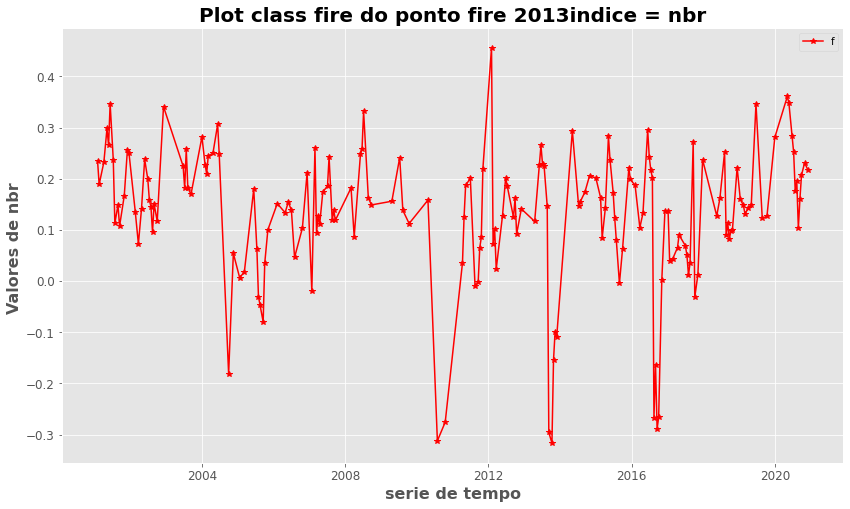

In [26]:
# Classe 1 ids = 1 fire 2013 
ptoV1 = return_dataframe_pto(1, 4)
ptoV1 = ptoV1.sort_values(by= ['tempo'])
show_line_Serie(ptoV1, dict_class['1'], dict_ids['4'], 'nbr')

carregando o ponto com (180, 20) 


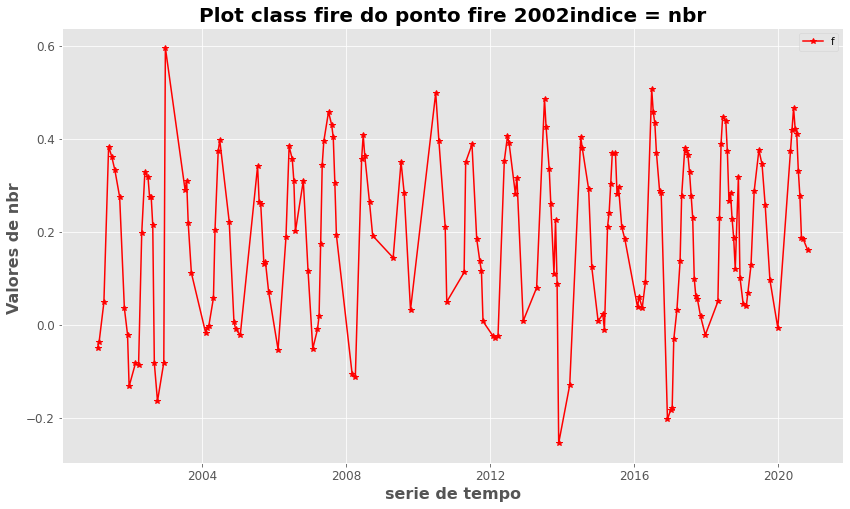

In [27]:
# Classe 1 ids = 1 fire 2002 
ptoV1 = return_dataframe_pto(1, 8)
ptoV1 = ptoV1.sort_values(by= ['tempo'])
show_line_Serie(ptoV1, dict_class['1'], dict_ids['8'], 'nbr')

In [28]:
def show_line_Serie_indice (myDF, name_cc, name_idss, indices, ls_cores):
    
    myDF = myDF.sort_values(by= ['tempo'])
    
    fig,ax = plt.subplots(figsize=(14, 8))   
    
    for cc, indic in enumerate(indices):
        ax.plot(myDF["tempo"], myDF[indic], marker="*", color= ls_cores[cc])

    texto = 'Plot class ' + name_cc +  ' do ponto ' + name_idss + " | {}".format(indices)
    plt.title(texto, fontweight="bold", size=20)
    plt.xlabel('serie de tempo',fontweight="bold", size=16)
    plt.ylabel('Valores de {} '.format(indices),fontweight="bold", size=16)

    plt.legend(indices, loc='best') #
    plt.show()

In [29]:
indices_ls = ['nbr','nbr2', 'ndmi','ndvi']
lscores = ['tomato', 'dimgray','brown','olive']

carregando o ponto com (164, 20) 


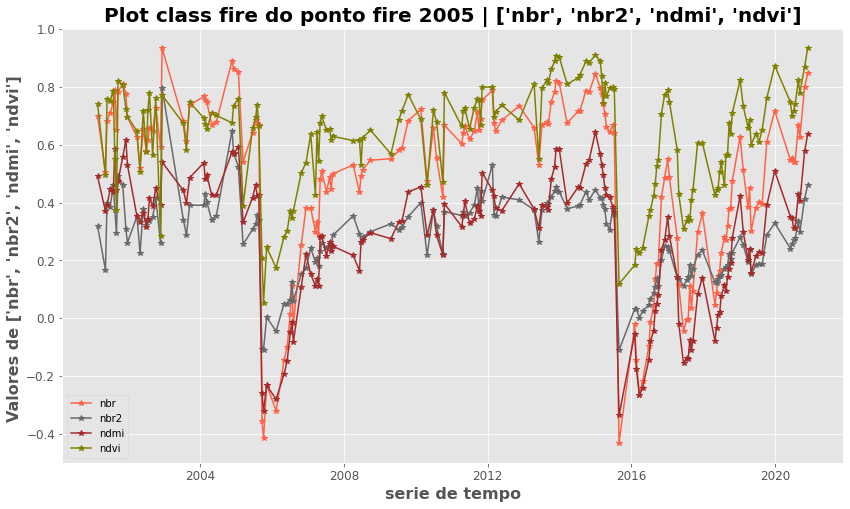

In [30]:
# Classe 1 ids = 1 fire 2005 
ptoV1 = return_dataframe_pto(1, 1)
show_line_Serie_indice(ptoV1, dict_class['1'], dict_ids['1'], indices_ls,lscores)

carregando o ponto com (183, 20) 


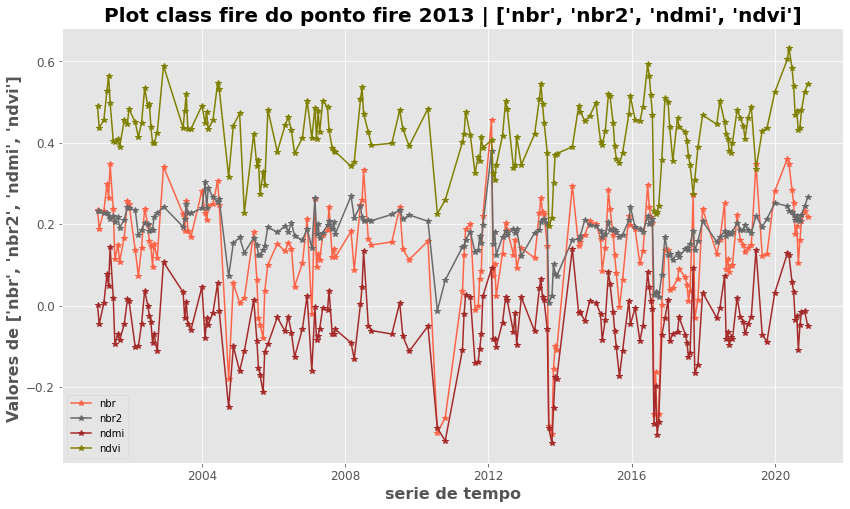

In [34]:
# Classe 1 ids = 1 fire 2013 
ptoV1 = return_dataframe_pto(1, 4)
show_line_Serie_indice(ptoV1, dict_class['1'], dict_ids['4'], indices_ls,lscores)

carregando o ponto com (180, 20) 


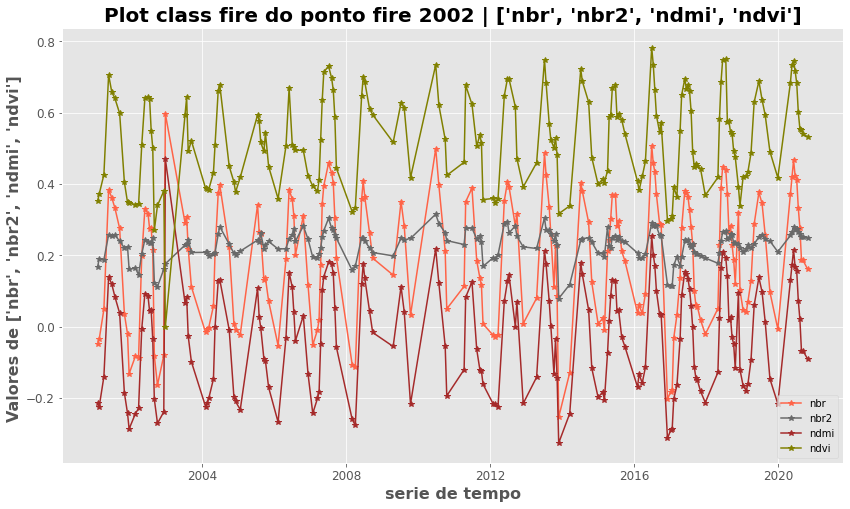

In [35]:
# Classe 1 ids = 1 fire 2002 

ptoV1 = return_dataframe_pto(1, 8)
show_line_Serie_indice(ptoV1, dict_class['1'], dict_ids['8'], indices_ls,lscores)

In [31]:
indices_ls = ['baims','baiml', 'bai']
lscores = ['orange', 'darkgoldenrod','yellow']

carregando o ponto com (164, 20) 


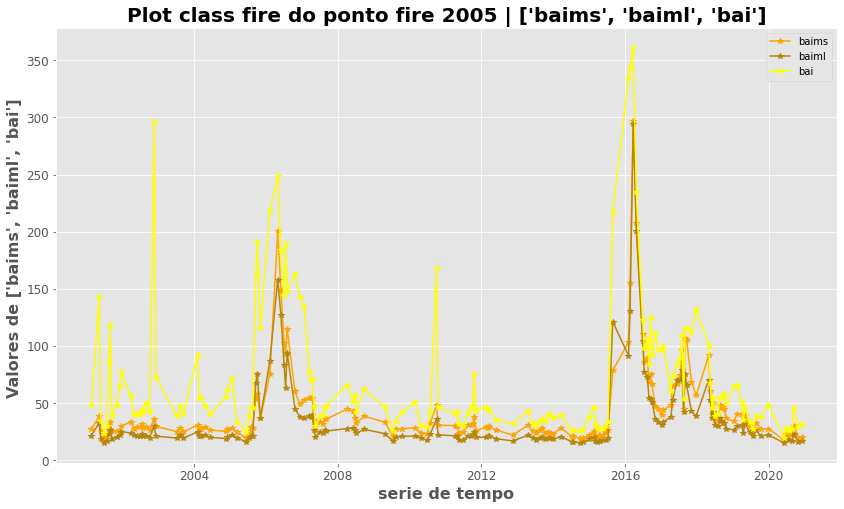

In [32]:
# Classe 1 ids = 1 fire 2005 
ptoV1 = return_dataframe_pto(1, 1)
show_line_Serie_indice(ptoV1, dict_class['1'], dict_ids['1'], indices_ls, lscores)

carregando o ponto com (183, 20) 


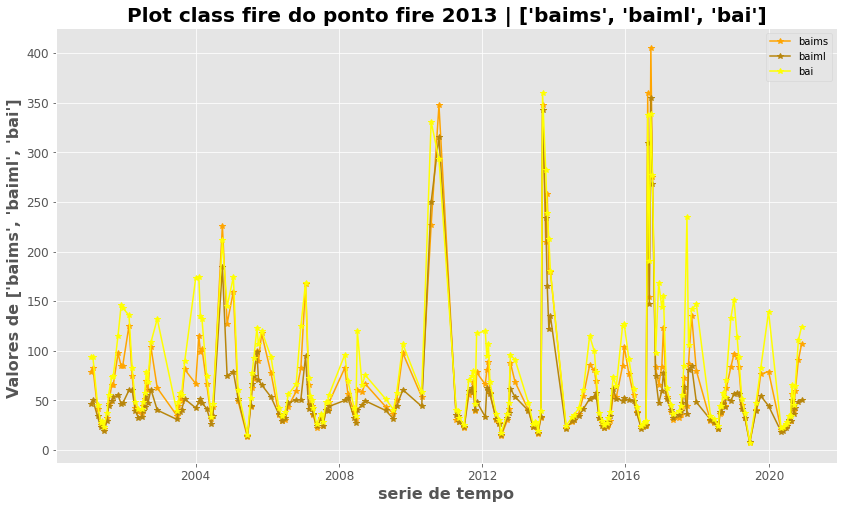

In [33]:
# Classe 1 ids = 1 fire 2013
ptoV1 = return_dataframe_pto(1, 4)
show_line_Serie_indice(ptoV1, dict_class['1'], dict_ids['4'], indices_ls, lscores)

carregando o ponto com (180, 20) 


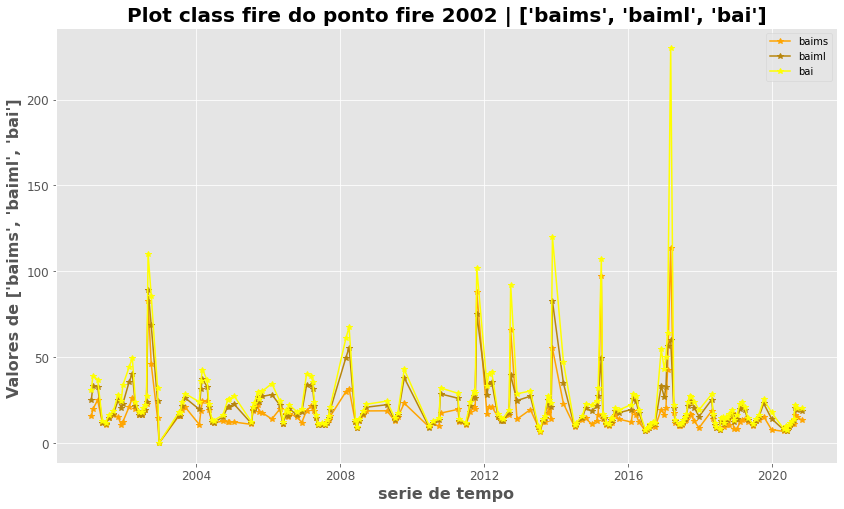

In [34]:
# Classe 1 ids = 1 fire 2002

ptoV1 = return_dataframe_pto(1, 8)
show_line_Serie_indice(ptoV1, dict_class['1'], dict_ids['8'], indices_ls, lscores)

In [35]:
indices_ls = ['ndvi','evi', 'savi']
lscores = ['olive', 'chartreuse','forestgreen']
#'bai', 'baiml', 'baims', 'blue', 'class', 'evi', 'ids', 'mirbi', 'nbr',
#       'nbr2', 'ndmi', 'ndvi', 'nir', 'red', 'savi', 'swir1', 'swir2',

carregando o ponto com (164, 20) 


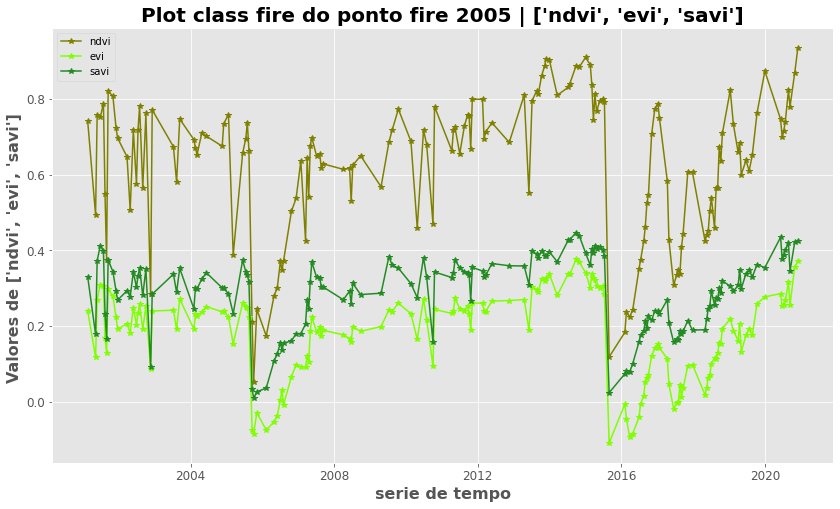

In [36]:
# Classe 1 ids = 1 fire 2005 
ptoV1 = return_dataframe_pto(1, 1)
show_line_Serie_indice(ptoV1, dict_class['1'], dict_ids['1'], indices_ls, lscores)

carregando o ponto com (183, 20) 


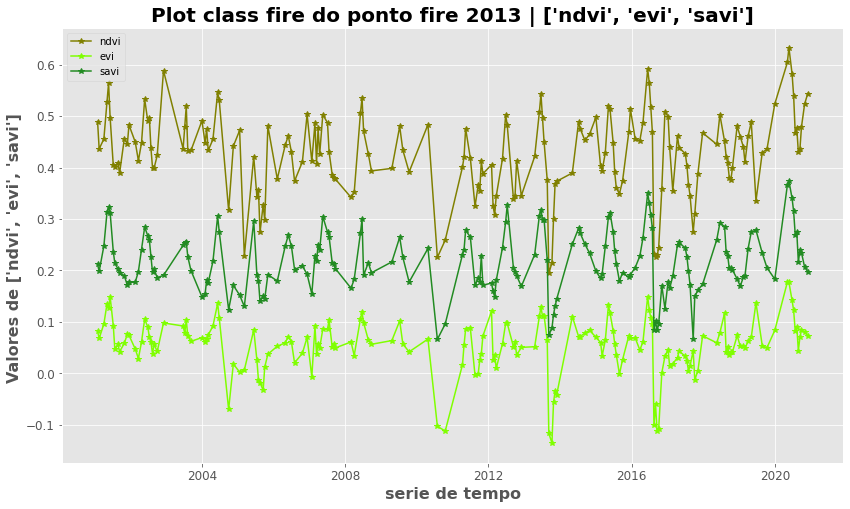

In [37]:
# Classe 1 ids = 1 fire 2013 
ptoV1 = return_dataframe_pto(1, 4)
show_line_Serie_indice(ptoV1, dict_class['1'], dict_ids['4'], indices_ls, lscores)

carregando o ponto com (180, 20) 


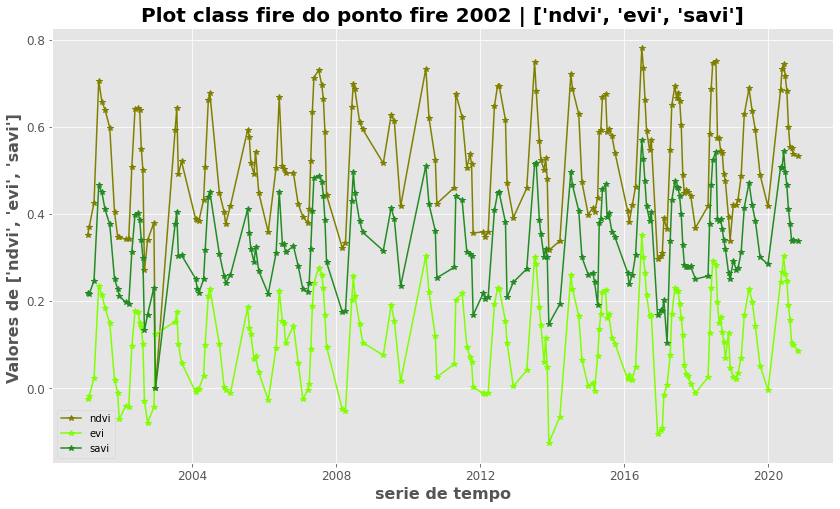

In [38]:
# Classe 1 ids = 1 fire 2002 
ptoV1 = return_dataframe_pto(1, 8)
show_line_Serie_indice(ptoV1, dict_class['1'], dict_ids['8'], indices_ls, lscores)

In [39]:
# newdf = newdf.sort_values(by="tempo")
# ls_color = ['firebrick', 'forestgreen','dimgray','royalblue','black', 'tan']
# for icc in [1]:    
#     for n_ids in [1, 4, 8]:
#         ptoV1 = return_dataframe_pto(icc, n_ids)
#         plt.plot(ptoV1['tempo'], ptoV1['evi'], color= ls_color[icc - 1], label= dict_class[str(icc)])

# plt.gcf().set_size_inches(12, 6)
# plt.tight_layout()

# plt.show()

## Analisando a combinação de pontos em um único indice 


In [40]:
def show_line_Serie_Ptos (ls_icc, ls_idss, indice, ls_cores):   
    
    fig,ax = plt.subplots(figsize=(14, 8))   
    
    for cc, n_idss in enumerate(ls_idss):
        print("ids = ", n_idss)
        myDF = return_dataframe_pto(ls_icc[cc], n_idss)
        myDF = myDF.sort_values(by= ['tempo'])
        
        ax.plot(myDF["tempo"], myDF[indice], marker="*", color= ls_cores[cc])

    texto = 'Plot class {} '.format(ls_icc) +  ' os pontos {} '.format(ls_idss) + " | " + indice
    plt.title(texto, fontweight="bold", size=20)
    plt.xlabel('serie de tempo',fontweight="bold", size=16)
    plt.ylabel('Valores de {} '.format(indice),fontweight="bold", size=16)

    plt.legend(indice, loc='best') #
    plt.show()

ids =  1
carregando o ponto com (164, 20) 
ids =  4
carregando o ponto com (183, 20) 
ids =  8
carregando o ponto com (180, 20) 


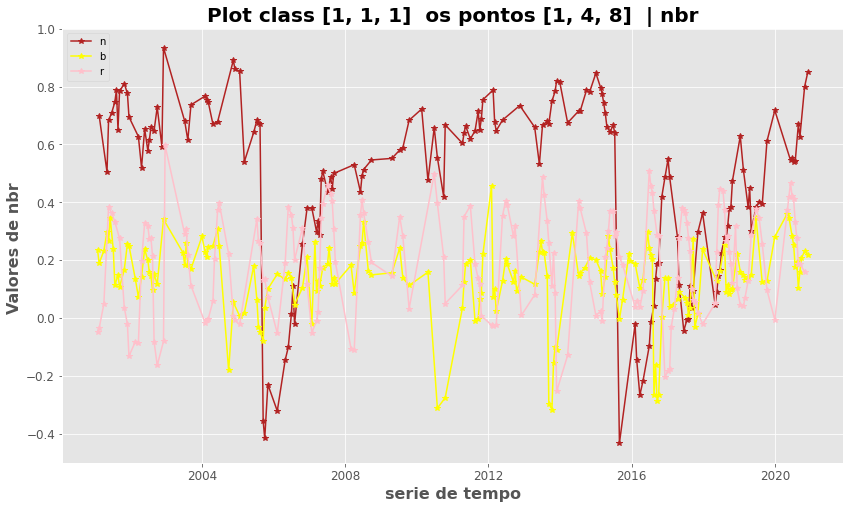

In [41]:
ls_cores = ['firebrick', 'yellow','pink']
show_line_Serie_Ptos([1,1,1], [1,4,8], 'nbr', ls_cores)

ids =  1
carregando o ponto com (164, 20) 
ids =  4
carregando o ponto com (183, 20) 
ids =  8
carregando o ponto com (180, 20) 


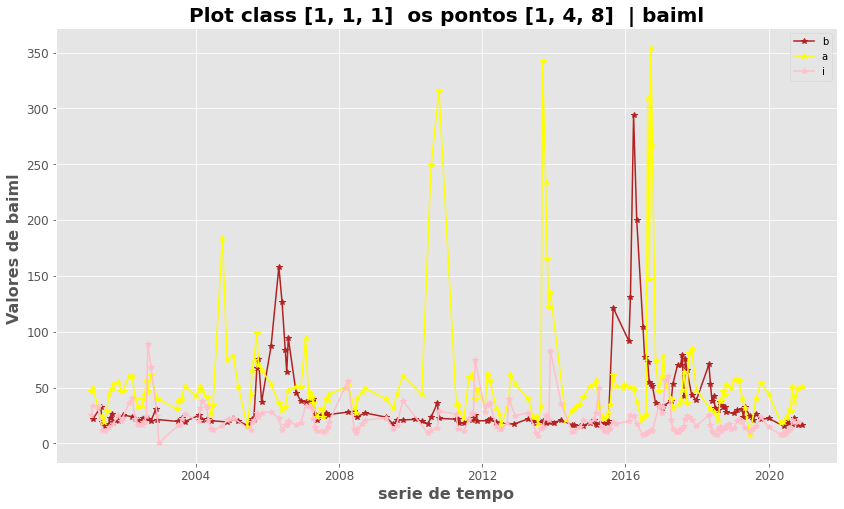

In [42]:
ls_cores = ['firebrick', 'yellow','pink']
show_line_Serie_Ptos([1,1,1], [1,4,8], 'baiml', ls_cores)

ids =  1
carregando o ponto com (164, 20) 
ids =  5
carregando o ponto com (183, 20) 
ids =  6
carregando o ponto com (172, 20) 


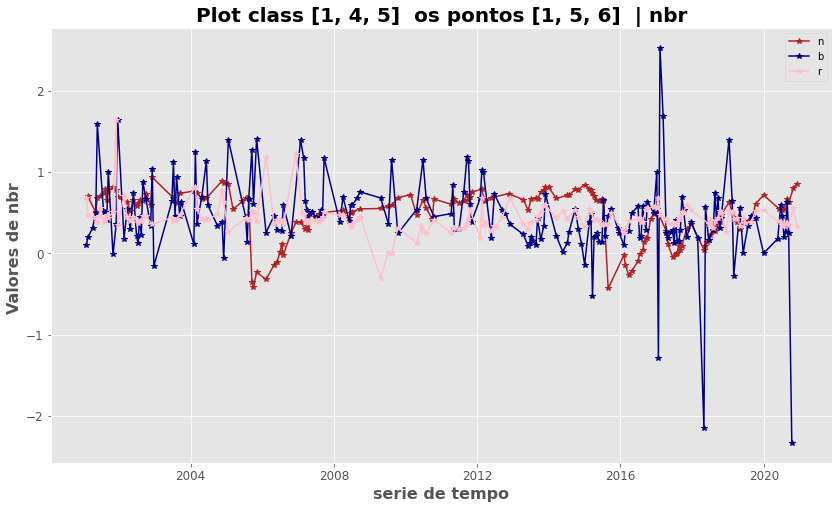

In [43]:
ls_cores = ['firebrick', 'darkblue','pink']
show_line_Serie_Ptos([1,4,5], [1,5,6], 'nbr', ls_cores)


ids =  4
carregando o ponto com (183, 20) 
ids =  5
carregando o ponto com (183, 20) 
ids =  6
carregando o ponto com (172, 20) 


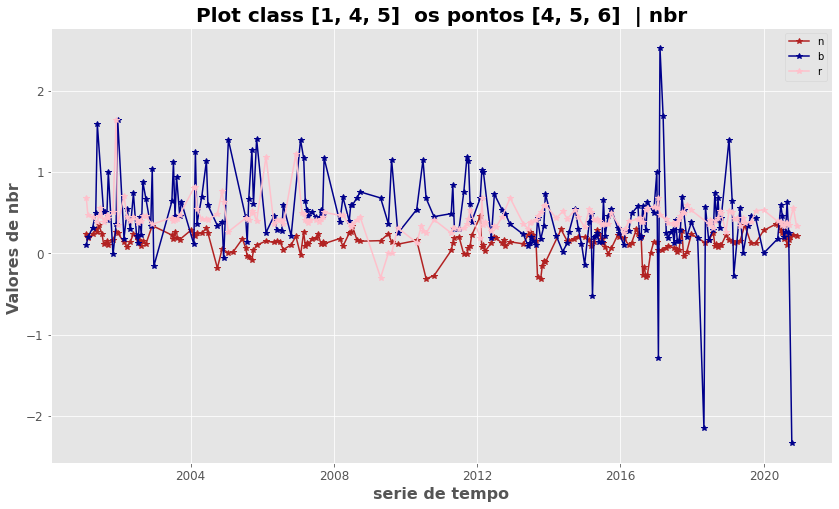

In [44]:
ls_cores = ['firebrick', 'darkblue','pink']
show_line_Serie_Ptos([1,4,5], [4,5,6], 'nbr', ls_cores)


ids =  8
carregando o ponto com (180, 20) 
ids =  5
carregando o ponto com (183, 20) 
ids =  6
carregando o ponto com (172, 20) 


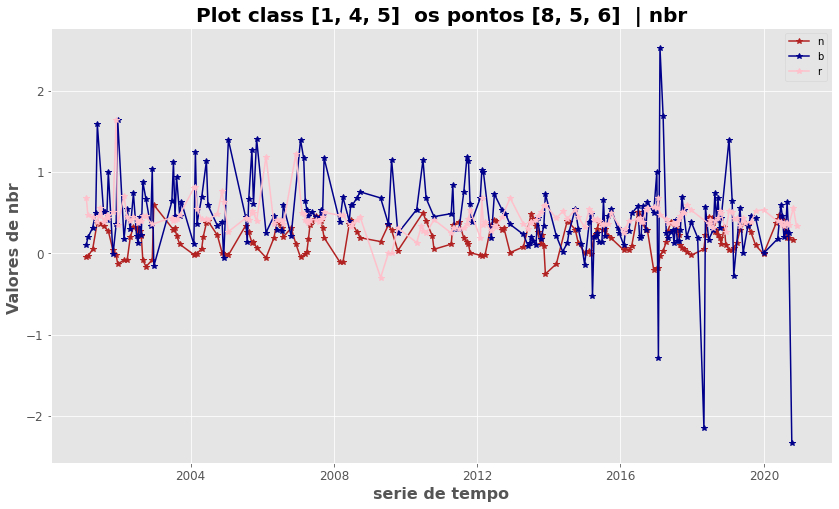

In [45]:
ls_cores = ['firebrick', 'darkblue','pink']
show_line_Serie_Ptos([1,4,5], [8,5,6], 'nbr', ls_cores)


In [ ]:
ls_cores = ['firebrick', 'goldenrod','greenyellow']
show_line_Serie_Ptos([1,3,2], [1,3,2], 'nbr', ls_cores)

In [ ]:
ls_cores = ['firebrick', 'goldenrod','greenyellow']
show_line_Serie_Ptos([1,3,2], [4,3,2], 'nbr', ls_cores)

In [ ]:
ls_cores = ['firebrick', 'goldenrod','greenyellow']
show_line_Serie_Ptos([1,3,2], [8,3,2], 'nbr', ls_cores)

## diferenças entre EVI e NBR

In [46]:
indices_ls = [  'evi',  'nbr']
# indices_ls = ['mirbi',]
# indices_ls = ['baims','baiml','nbr2', 'ndmi','bai',]
newdf = newdf.sort_values(by="tempo")
fig = px.line(newdf[newdf['class'] == 1], x='tempo', y=indices_ls)
fig.show()

NameError: name 'px' is not defined

In [47]:
indices_ls = ['nbr','nbr2', 'ndmi']
newdf = newdf.sort_values(by="tempo")
fig = px.line(newdf[newdf['class'] == 1], x='tempo', y=indices_ls)
fig.show()

NameError: name 'px' is not defined

In [ ]:
indices_ls = ['baims','baiml','bai']
newdf = newdf.sort_values(by="tempo")
fig = px.line(newdf[newdf['class'] == 1], x='tempo', y=indices_ls)
fig.show()

# Analises de regresão linear


In [48]:
newdf['tempo'] = pd.to_datetime(newdf['tempo'])
newdf['tempo'] = newdf['tempo'].dt.strftime('%d.%m.%Y')
newdf['nyear'] = pd.DatetimeIndex(newdf['tempo']).year
newdf['month'] = pd.DatetimeIndex(newdf['tempo']).month
newdf['day'] = pd.DatetimeIndex(newdf['tempo']).day

In [49]:
# Classe 1 ids = 1 fire 2002 
ptoV1 = return_dataframe_pto(1, 1)
ptoV1 = ptoV1.sort_values(by= ['tempo'])


carregando o ponto com (164, 23) 


In [50]:
media = ptoV1['nbr'].mean()
media

0.22730186471036584

In [51]:
ptoV1.shape[0]

164

In [52]:
def calculo_coeficientes (df_teste, indice):
    
    media_ind = df_teste[indice].mean()
    tam = df_teste.shape[0]
    
    ls_tempo = [kk for kk in range(1, tam + 1)]
    df_teste['ind_time'] = ls_tempo
    media_time = np.mean(ls_tempo)
    print("a media do tempo para o dado é ", media_time)
    denum_coef = [(kk - media_time) * (kk - media_time) for kk in range(1, tam + 1)] 
    denum_coef = np.sum(denum_coef)   
    
    df_teste['lsVEs_coef'] = df_teste['ind_time'].apply(
        lambda valor: (valor - media_time))
    
    df_teste['lsVDi_coef'] = df_teste[indice].apply(
        lambda valor: (valor - media_ind))
    
    df_teste['lsV_coef' + indice] = (df_teste['lsVEs_coef'] * df_teste['lsVDi_coef']) / denum_coef
    
    coef_b1 = df_teste['lsV_coef' + indice].sum()
    
    coef_b0 = media_ind - (coef_b1 * media_time)
    
    return coef_b0, coef_b1 
    
    
    

In [53]:
# Classe 1 ids = 1 fire 2002 
ptoV1 = return_dataframe_pto(1, 1)
ptoV1 = ptoV1.sort_values(by= ['tempo'])

coefB0, coefB1 = calculo_coeficientes(ptoV1, 'nbr')
coefB0, coefB1

carregando o ponto com (164, 23) 
a media do tempo para o dado é  82.5


(0.2854943748870791, -0.000705363759717737)

In [54]:
def show_curvas_Serie (myDF, name_cc, name_idss, indice, cB0, cB1, amplitud, showInt= True):
    
    myDF = myDF.sort_values(by= ['tempo'])    
    fig,ax = plt.subplots(figsize=(14, 8))
    tam = myDF.shape[0]
    ls_tempo = [kk for kk in range(1, tam + 1)]
    myDF['ind_time'] = ls_tempo
    myDF[indice + '_est'] = myDF['ind_time'].apply(lambda x : (cB1 * x) + cB0)
    
    intervalo = 0.1 * myDF[indice].std() 
    media = myDF[indice].mean()
    intervalo = intervalo / media
    
    ax.plot(myDF["tempo"], myDF[indice], marker="*", color='red')
    ax.plot(myDF["tempo"], myDF[indice + '_est'], marker="^", color='green')
    if showInt:
        ax.fill_between(
                    myDF["tempo"], 
            myDF[indice + '_est'] - amplitud * intervalo, 
            myDF[indice + '_est'] + amplitud * intervalo,
            color='yellow', alpha=0.1
        )
    
    
#     text = 'Plot class {} do ponto {}'.format(dict_class[cc], dict_ids[idss])
    texto = 'Plot class ' + name_cc +  ' do ponto ' + name_idss + "indice = " + indice
    plt.title(texto, fontweight="bold", size=20)
    plt.xlabel('serie de tempo',fontweight="bold", size=16)
    plt.ylabel('Valores de {} '.format(indice),fontweight="bold", size=16)
#     plt.xticks(data,rotation=70)    
    plt.legend(name_idss, loc='best') #
    plt.show()

carregando o ponto com (164, 23) 


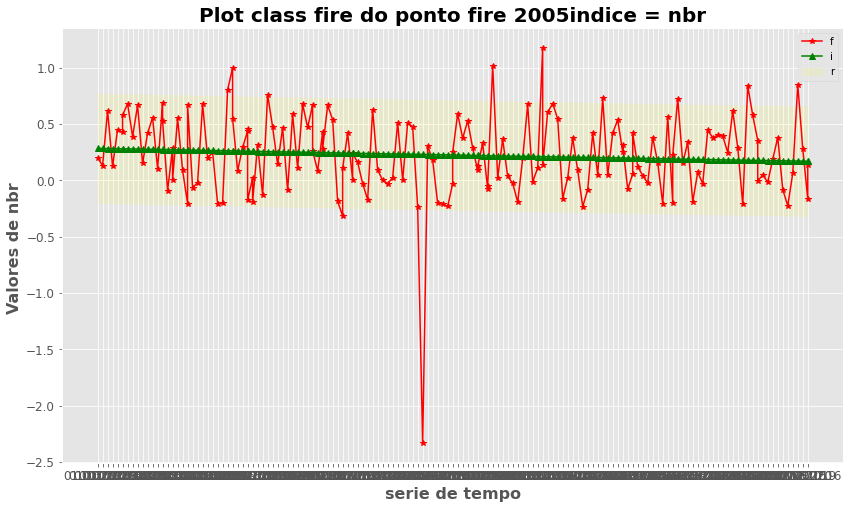

In [56]:
ptoV1 = return_dataframe_pto(1, 1)
show_curvas_Serie(ptoV1, dict_class['1'], dict_ids['1'], 'nbr', coefB0, coefB1, 3, True)

carregando o ponto com (183, 23) 


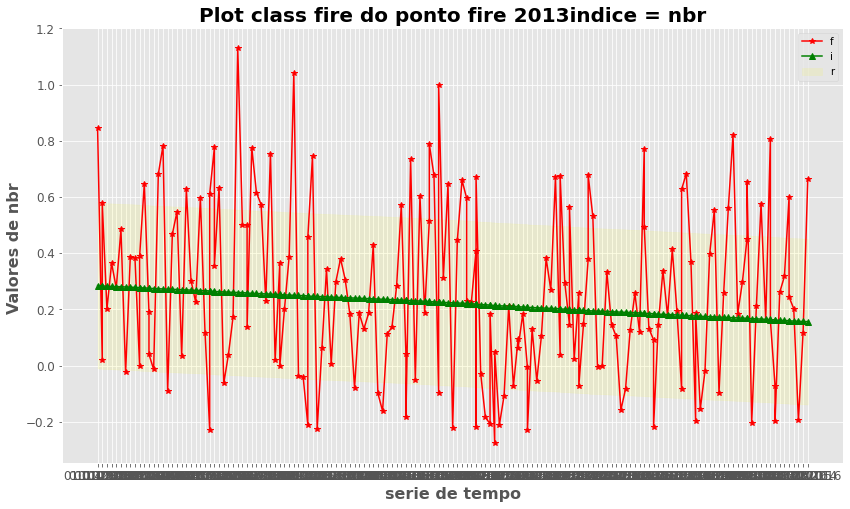

In [57]:
ptoV1 = return_dataframe_pto(1, 4)
show_curvas_Serie(ptoV1, dict_class['1'], dict_ids['4'], 'nbr', coefB0, coefB1, 2.5, True)

carregando o ponto com (180, 23) 


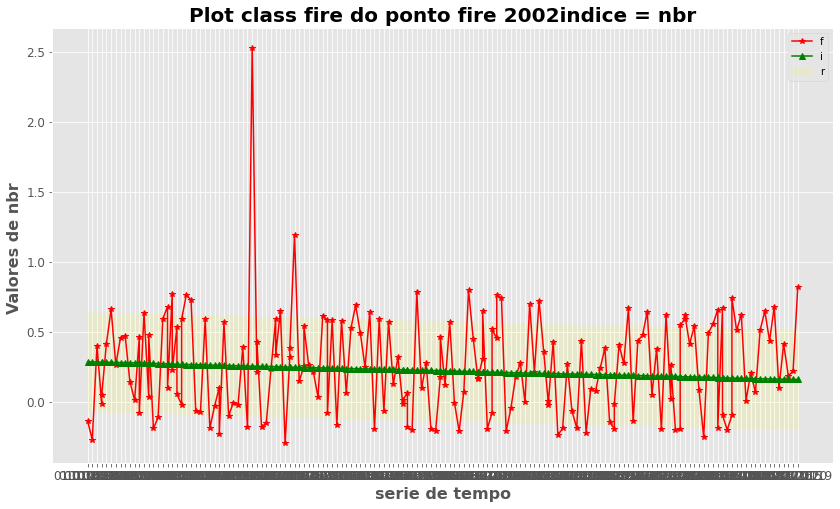

In [58]:
ptoV1 = return_dataframe_pto(1, 8)
show_curvas_Serie(ptoV1, dict_class['1'], dict_ids['8'], 'nbr', coefB0, coefB1, 2.5 , True)

In [59]:
indices_ls = ['baiml']
lscores = ['orange']

carregando o ponto com (164, 23) 


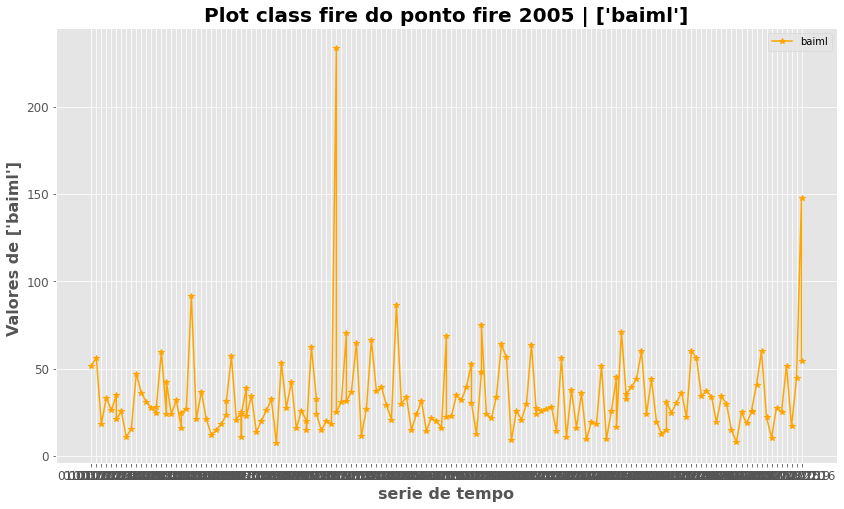

In [60]:
ptoV1 = return_dataframe_pto(1, 1)
show_line_Serie_indice(ptoV1, dict_class['1'], dict_ids['1'], indices_ls, lscores)

In [61]:
coefB0_bai, coefB1_bai = calculo_coeficientes(ptoV1, 'baiml')
coefB0_bai, coefB1_bai

a media do tempo para o dado é  82.5


(36.967723050074824, -0.043030096283242426)

carregando o ponto com (164, 23) 


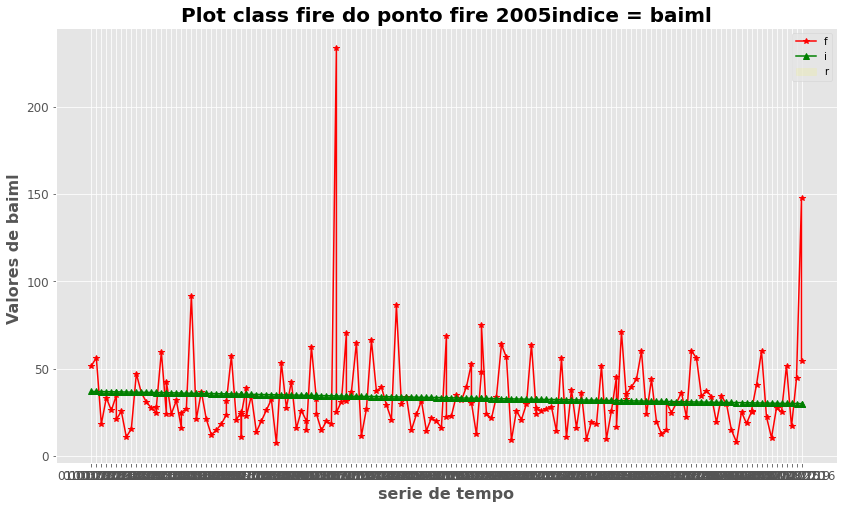

In [64]:

ptoV1 = return_dataframe_pto(1, 1)
show_curvas_Serie(ptoV1, dict_class['1'], dict_ids['1'], 'baiml', coefB0_bai, coefB1_bai, 3, True)

carregando o ponto com (167, 23) 


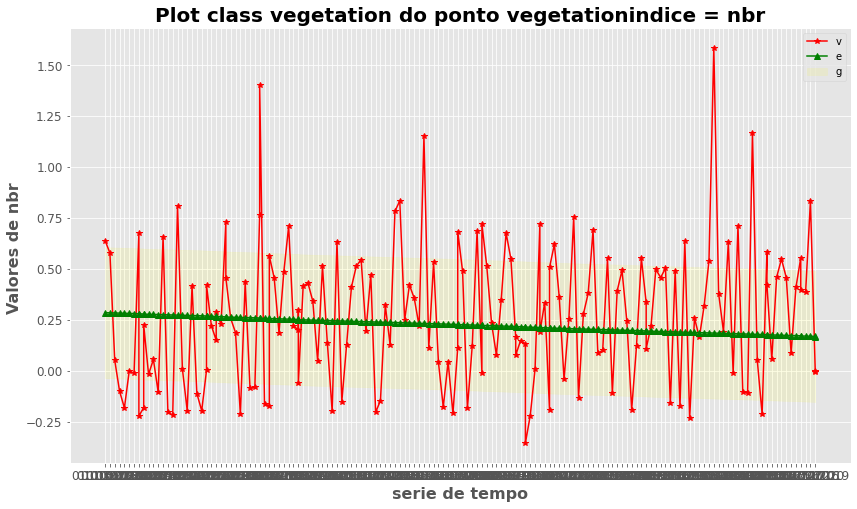

In [65]:
ptoV1 = return_dataframe_pto(2, 2)
show_curvas_Serie(ptoV1, dict_class['2'], dict_ids['2'], 'nbr', coefB0, coefB1, 2.5, True)